# Building a Decision Tree Algorithm from Scratch and Comparing with scikit-learn

## Introduction

In this notebook, we manually implement a simple decision tree regressor with a maximum depth of 2.

Instead of relying entirely on scikit-learn, we:

- Write a custom function to find the best split based on mean squared error (MSE)
- Recursively split the data into left and right groups
- Compute predictions by assigning the mean Y value in each leaf node
- Compare our manual predictions to those from scikit-learn's `DecisionTreeRegressor`

This step-by-step approach helps us better understand how decision trees make decisions and perform regression tasks.

## Dataset
- 20 random (X, Y) pairs
- Y is the target, X is the only feature

In [1]:
import pandas as pd
import numpy as np

# Data
random_data = {
    'X': [3.75, 9.51, 7.32, 5.99, 1.56, 1.56, 0.58, 8.66, 6.01, 7.08,
          0.21, 9.70, 8.32, 2.12, 1.82, 1.83, 3.04, 5.25, 4.32, 2.91],
    'Y': [16.21, 36.15, 27.14, 22.14, 14.61, 11.23, 8.88, 30.14, 23.94, 28.46,
          5.32, 36.85, 30.77, 12.79, 11.25, 16.21, 16.10, 20.63, 21.60, 13.30]
}

df = pd.DataFrame(random_data)
df

,X,Y
0,3.75,16.21
1,9.51,36.15
2,7.32,27.14
3,5.99,22.14
4,1.56,14.61
5,1.56,11.23
6,0.58,8.88
7,8.66,30.14
8,6.01,23.94
9,7.08,28.46


## Training a Decision Tree Regressor with scikit-learn

Before building the tree manually, we first train a `DecisionTreeRegressor` from scikit-learn using the same data.

- We set `max_depth = 2` to limit the tree to two levels.
- After fitting the model, we generate predictions for all X values and store them in a new column called `y_pred`.

This serves as a reference to compare our manual implementation against the scikit-learn version.

In [2]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

X = df[["X"]]
y = df["Y"]

tree = DecisionTreeRegressor(max_depth=2, random_state=42)
tree.fit(X, y)
df["y_pred"] = tree.predict(X)
df

,X,Y,y_pred
0,3.75,16.21,13.9625
1,9.51,36.15,31.5850
2,7.32,27.14,31.5850
3,5.99,22.14,22.0775
4,1.56,14.61,13.9625
5,1.56,11.23,13.9625
6,0.58,8.88,7.1000
7,8.66,30.14,31.5850
8,6.01,23.94,22.0775
9,7.08,28.46,31.5850


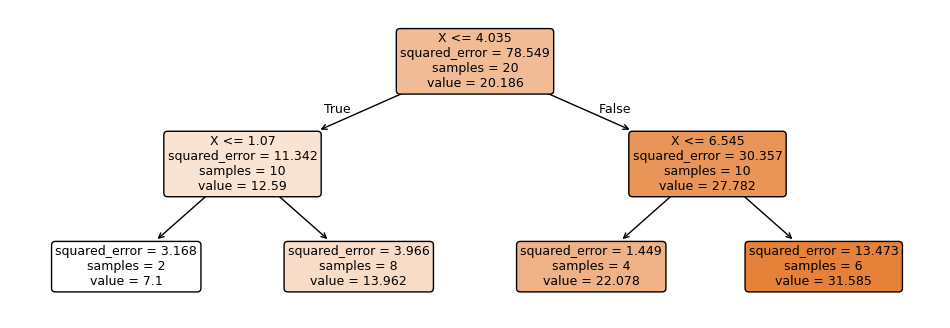

In [3]:
plt.figure(figsize=(12, 4))
plot_tree(tree, feature_names=["X"], filled=True, rounded=True, fontsize=9)
plt.show()

Mean Square Error:  
  
$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \bar{y})^2
$

In [4]:
def calculate_mse(y):
    return np.mean((y - np.mean(y)) ** 2)

## Logic of `find_best_split(X, y)`

Goal: Find the best split point to divide the data into two groups.

1. Sort the X values in ascending order.
2. Use the average between each pair of X values as a split candidate.
3. Split the data into two parts: Left group: X < split, Right group: X >= split
4. Calculate the MSE (mean squared error) for each group by using calculate_mse function above.
5. Combine the two MSE values using weighted average based on group size.
6. Choose the split point with the smallest total MSE.
7. Return the best split point and its MSE value.

In [5]:
def find_best_split(X, y):
    best_split = None
    best_mse = float("inf")

    # step 1:
    sorted_indices = X.argsort()
    X_sorted = X[sorted_indices]
    y_sorted = y[sorted_indices]

    # step 2:
    for i in range(1, len(X)):
        split_value = (X_sorted[i - 1] + X_sorted[i]) / 2

        # step 3:
        left_mask = X < split_value
        right_mask = X >= split_value

        y_left = y[left_mask]
        y_right = y[right_mask]

        if len(y_left) == 0 or len(y_right) == 0:
            continue

        # step 4 and step 5:
        mse = (len(y_left) * calculate_mse(y_left) + len(y_right) * calculate_mse(y_right)) / len(y)

        # step 6:
        if mse < best_mse:
            best_mse = mse
            best_split = split_value

    # step 7:
    return best_split, best_mse

## Finding the First Split (Root Node)

We extract the X and Y values from the DataFrame as NumPy arrays:

In [6]:
X_values = df["X"].values
y_values = df["Y"].values

split1, mse1 = find_best_split(X_values, y_values)
print("1. Split (root):", split1)

1. Split (root): 4.035


## Creating Left and Right Groups Based on the First Split

We divide the data into two groups using the split value `split1`.

These masks are used to filter the original X and Y arrays.

In [7]:
left_mask_lvl1 = X_values < split1
right_mask_lvl1 = X_values >= split1

X_left_lvl1 = X_values[left_mask_lvl1]
y_left_lvl1 = y_values[left_mask_lvl1]

X_right_lvl1 = X_values[right_mask_lvl1]
y_right_lvl1 = y_values[right_mask_lvl1]

print(f"X_left_lvl1: {X_left_lvl1}")
print(f"y_left_lvl1: {y_left_lvl1}")
print(f"X_right_lvl1: {X_right_lvl1}")
print(f"y_right_lvl1: {y_right_lvl1}")

X_left_lvl1: [3.75 1.56 1.56 0.58 0.21 2.12 1.82 1.83 3.04 2.91]
y_left_lvl1: [16.21 14.61 11.23  8.88  5.32 12.79 11.25 16.21 16.1  13.3 ]
X_right_lvl1: [9.51 7.32 5.99 8.66 6.01 7.08 9.7  8.32 5.25 4.32]
y_right_lvl1: [36.15 27.14 22.14 30.14 23.94 28.46 36.85 30.77 20.63 21.6 ]


## Visualizing Left and Right Nodes

After splitting the data at the first split point (`split1`), we create two separate DataFrames:

- `df_left_lvl1`: contains the X and Y values where `X < split1`
- `df_right_lvl1`: contains the X and Y values where `X >= split1`

In [8]:
df_left_lvl1 = pd.DataFrame({
    "X": X_left_lvl1,
    "Y": y_left_lvl1
})

df_right_lvl1 = pd.DataFrame({
    "X": X_right_lvl1,
    "Y": y_right_lvl1
})

print("Left Node (X < split1):")
display(df_left_lvl1)

print("Right Node (X >= split1):")
display(df_right_lvl1)

Left Node (X < split1):


,X,Y
0,3.75,16.21
1,1.56,14.61
2,1.56,11.23
3,0.58,8.88
4,0.21,5.32
5,2.12,12.79
6,1.82,11.25
7,1.83,16.21
8,3.04,16.10
9,2.91,13.30


Right Node (X >= split1):


,X,Y
0,9.51,36.15
1,7.32,27.14
2,5.99,22.14
3,8.66,30.14
4,6.01,23.94
5,7.08,28.46
6,9.70,36.85
7,8.32,30.77
8,5.25,20.63
9,4.32,21.60


## Finding the Second Level Splits (Left and Right)

After finding the root split (`split1 = 4.035`), we continue building the tree to depth = 2.

- The second split (`split_left`) is found within the left node (`X < split1`).
- The third split (`split_right`) is found within the right node (`X >= split1`).

These two splits divide the dataset into four final leaf nodes, completing the decision tree with `max_depth = 2`.

In [9]:
split_left, _ = find_best_split(X_left_lvl1, y_left_lvl1)
print("2. Split (left):", split_left)

split_right, _ = find_best_split(X_right_lvl1, y_right_lvl1)
print("3. Split (right):", split_right)

2. Split (left): 1.07
3. Split (right): 6.545


## Predicting Y Values from Tree Structure

This function assigns a predicted Y value to each observation based on the three split points:

- `split1`: the root split
- `split_left`: the split within the left child node
- `split_right`: the split within the right child node

Each observation is compared against the splits to determine which of the four leaf nodes it belongs to.

Then, the prediction is the mean Y value of the corresponding leaf node.

The function returns an array `y_pred` with predicted values for all X values.

In [10]:
def assign_leaf_prediction(X_values, split1, split_left, split_right, y_values):
    y_pred = np.zeros_like(y_values)

    for i, x in enumerate(X_values):
        if x < split1:
            if x < split_left:
                y_pred[i] = np.mean(y_values[(X_values < split1) & (X_values < split_left)])
            else:
                y_pred[i] = np.mean(y_values[(X_values < split1) & (X_values >= split_left)])
        else:
            if x < split_right:
                y_pred[i] = np.mean(y_values[(X_values >= split1) & (X_values < split_right)])
            else:
                y_pred[i] = np.mean(y_values[(X_values >= split1) & (X_values >= split_right)])
    
    return y_pred

## Applying the Manual Tree to Make Predictions

We now use the `assign_leaf_prediction` function to manually predict the Y values for all X values based on the three split points (`split1`, `split_left`, `split_right`).

The result is stored in `y_pred_manual` and added to the DataFrame as a new column:

- `y_pred_manual`: predicted values based on our custom decision tree logic

In [11]:
y_pred_manual = assign_leaf_prediction(X_values, split1, split_left, split_right, y_values)
df["y_pred_manual"] = y_pred_manual

## Comparing Manual Predictions with scikit-learn Tree

We compare our manual tree predictions (`y_pred_manual`) with the predictions made by scikit-learn's `DecisionTreeRegressor` (`y_pred`).

- `diff`: absolute difference between the two prediction arrays
- `diff.sum().round(2)`: total difference, rounded to 2 decimal places

If the result is 0.0, it means our manual implementation is identical to scikit-learn's output.

We also display the relevant columns from the DataFrame for visual comparison.

In [12]:
diff = np.abs(df["y_pred"] - df["y_pred_manual"])
print("Total difference:", diff.sum().round(2))
df[["X", "Y", "y_pred", "y_pred_manual"]]

Total difference: 0.0


,X,Y,y_pred,y_pred_manual
0,3.75,16.21,13.9625,13.9625
1,9.51,36.15,31.5850,31.5850
2,7.32,27.14,31.5850,31.5850
3,5.99,22.14,22.0775,22.0775
4,1.56,14.61,13.9625,13.9625
5,1.56,11.23,13.9625,13.9625
6,0.58,8.88,7.1000,7.1000
7,8.66,30.14,31.5850,31.5850
8,6.01,23.94,22.0775,22.0775
9,7.08,28.46,31.5850,31.5850


## Conclusion

We successfully implemented a decision tree regressor manually with `max_depth = 2`.

- We computed the best split points at each level using mean squared error (MSE).
- We divided the data into four final leaf nodes based on three split thresholds.
- We calculated predictions manually by assigning the mean Y value of each leaf.
- Our manual predictions perfectly matched the predictions from scikit-learn's `DecisionTreeRegressor`.

This confirms that we understand the core logic of how decision trees work internally.